In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [12]:
import numpy as np

from sklearn.datasets import make_blobs
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

import matplotlib.pyplot as plt

In [28]:
head = lambda x, k = 6: x[:k]

# Simple data

In [43]:
X, y = make_blobs(
    n_samples=100, 
    centers=2, 
    n_features=5,
    random_state=0)

In [62]:
print(head(y))
print(head(X))

[1 0 0 0 1 0]
[[ 2.33661378 -2.8808903   6.26769229  8.09409728 -1.02974155]
 [ 0.47823763  6.23331938  3.00468833  0.9852149  -2.75233953]
 [ 0.02032508  3.95780555  1.59167155  1.37914513 -3.06770103]
 [ 1.03953207  4.46029387  2.28744856  0.30034759 -1.76482574]
 [ 3.6650706  -2.43720073  8.60871299  8.08937457 -4.99034186]
 [ 1.49733495  3.72799936  2.19722068  0.57833524 -0.83536526]]


### summary

In [53]:
np.apply_along_axis(np.mean, 0, X)

array([ 1.83426645,  1.48072095,  4.87396308,  4.95567497, -1.79653394])

In [54]:
np.apply_along_axis(np.std, 0, X)

array([1.38296392, 3.07374281, 3.01867169, 4.26920337, 1.02661866])

### standardize

In [63]:
sc = preprocessing.StandardScaler()

In [64]:
sc.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [65]:
X_std = sc.transform(X)

In [66]:
tmp = X_std
print(np.apply_along_axis(np.mean, 0, tmp))
print(np.apply_along_axis(np.std,  0, tmp))

[ 6.46149800e-16 -1.35447209e-16 -3.06421555e-16 -4.46309656e-16
 -2.45359288e-16]
[1. 1. 1. 1. 1.]


### PCA

In [68]:
pca = PCA(n_components=2)
pca.fit(X_std)
X_dr = pca.transform(X_std)
print(X_dr.shape)

(100, 2)


### use the pipeline

In [70]:
pipe = Pipeline(steps=[
    ('Preprocessing', preprocessing.StandardScaler()),
    ('Dim_Reduct',    PCA(n_components=2))
])
pipe

Pipeline(memory=None,
     steps=[('Preprocessing', StandardScaler(copy=True, with_mean=True, with_std=True)), ('Dim_Reduct', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [73]:
pipe.fit(X)
X_pipe = pipe.transform(X)

### Plot the results

In [74]:
fig, axes = plt.subplots(nrows = 1, ncols = 4)

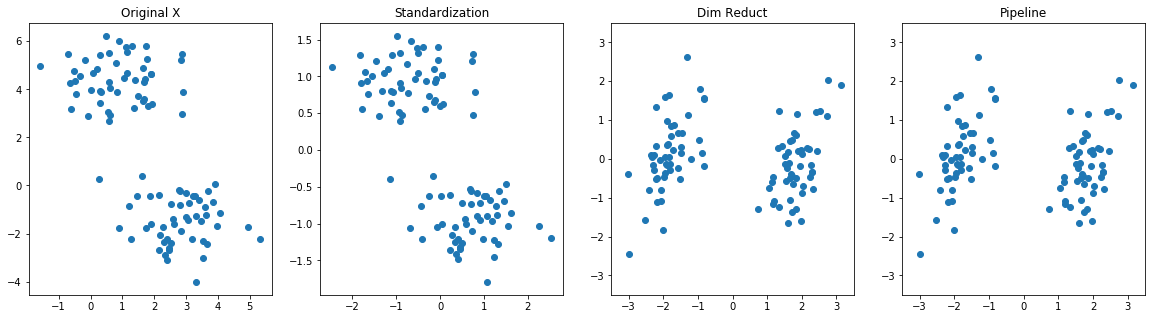

In [85]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))
axes[0].scatter(     X[:, 0],      X[:, 1], marker="o")
axes[1].scatter( X_std[:, 0],  X_std[:, 1], marker="o")
axes[2].scatter(  X_dr[:, 0],   X_dr[:, 1], marker="o")
axes[3].scatter(X_pipe[:, 0], X_pipe[:, 1], marker="o")

axes[0].set_title("Original X")
axes[1].set_title("Standardization")
axes[2].set_title("Dim Reduct")
axes[3].set_title("Pipeline")

axes[2].set_xlim((-3.5, 3.5)); axes[2].set_ylim((-3.5, 3.5))
axes[3].set_xlim((-3.5, 3.5)); axes[3].set_ylim((-3.5, 3.5))

plt.show()

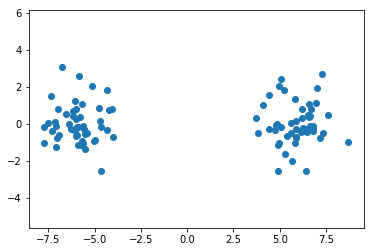

In [50]:
tmp = X_dr
plt.scatter(tmp[:, 0], tmp[:, 1], marker="o")
plt.axis('equal')
plt.show()